Agora vamos para outra parte muito importante, que é acharmos raízes de equações. O ponto principal desse capitulo é resolvermos o problema
$$
f(x) = 0
$$
Como sempre, nosso problema é extremamente fácil de ser escrito. Porém ele vai um pouco mais profundo. Para equações lineares, quadráticas e até cúbicas em um certo nível, conseguimos achar nossas raízes de forma fácil. Porém, nem sempre nossas equações serão tão simples, então se faz importante achar um método que nos dê um valor para as raízes de qualquer equação, ou, pelo menos, uma aproximação suficientemente boa. Inicialmente, se formos considerar um polinômio, da forma
$$
c_o + c_1x + c_2x^2 + \cdots + c_{n-1}x^{n-1} = 0
$$
Vamos ter $n-1$ raízes. Alem disso, se fossemos considerar um problema do tipo
$$
\mathbf{f(x)} = \mathbf{0}
$$
Onde vamos ter um sistema do tipo
$$
\begin{cases}
f_0(x_0, x_1, \cdots, x_{n-1}) = 0 \\
f_1(x_0, x_1, \cdots, x_{n-1}) = 0 \\
\vdots \\
f_{n-1}(x_0, x_1, \cdots, x_{n-1}) = 0
\end{cases}
$$
Ademais, além disso, vamos atacar o problema de tentar achar os mínimos de uma função, ou seja
$$
\min \phi(\mathbf{x})
$$


Vamos iniciar tentando achar raízes para um equação não linear de uma variável. Para ser algo mais concreto, vamos tentar resolver a equação
$$
e^{x- \sqrt{x}} - x =0
$$
O primeiro passo que poderíamos fazer é tentar ver como a função se comporta e tentar mais ou menos estimar alguns valores de interesse nosso. Por inspeção podemos estimar que nossa primeira raiz $x^\star$ está perto de $1$, em fato ela é $1$, basta substituir na nossa equação. Outro ponto de interesse parece ser $\approx 2.5$. Inicialmente podemos ja definir que por força bruta nosso problema não será resolvido. Portanto não será falado sobre. Dos métodos que serão utilizados, podemos definir dois principais, aqueles que limitam onde a raiz está, ou seja, com dois valores, chamando-os de $x_0,x_1$, sabemos que $f(x_0)>0 , f(x_1)<0$. Temos aqueles não limitantes também, onde fazemos uma estimativa inicial da nossa raiz e vamos melhorando nossa estimativa. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

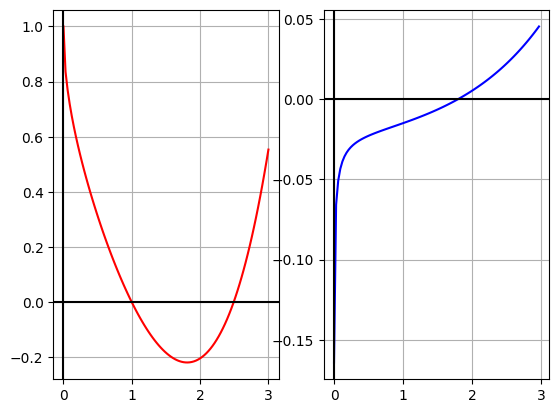

In [2]:
x = np.linspace(0, 3, 100)
y = np.exp(x - np.sqrt(x)) - x
dy = np.diff(y)
plt.subplot(121)
plt.plot(x, y, 'r')
plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')
plt.grid()
plt.subplot(122)
plt.plot(x[:99], dy, 'b')
plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')
plt.grid()
plt.show()

É importante colocarmos um termo de parada para nossos métodos, para que não fiquemos em um loop infinito. Para isso, vamos definir uma tolerância $\epsilon$ e vamos parar quando $|f(x^\star)| < \epsilon$. Como não sabemos nosso valor exato, vamos checar se nossa iterações estão convergindo para algum número, para isso vamos usar que
$$
\frac{|x^{(k)} - x^{(k-1)}|}{|x^{(k)}|} < \epsilon
$$



O primeiro algoritmo que vamos estudar é o método do ponto fixo, ou iteração do Ponto fixo. Esse método resolve um problema similar, que é
$$
x = g(x)
$$
Para a função $g(x) = x^2 - 6$ os pontos fixos são $-2,3$, pois $g(-2) = -2, g(3) = 3$. Podemos reescrever nossa equação como
$$
f(x) = g(x) - x = 0
$$
Relembrando da nossa equação que vamos usar como teste $e^{x- \sqrt{x}} - x =0$, podemos reescrever como
$$
g(x) = e^{x- \sqrt{x}}
$$
Vemos que nesse problema temos dois pontos fixos, quando traçamos as retas de $g(x)$ e $y = x$. Esses pontos parecem ser aqueles que chutamos como solução, ou seja, $\approx 1 , \approx 2.5$. O jeito mais fácil de implementa-lo é simplesmente iterar começando inicialmente com $x^{(0)}$ e colocando na nossa equação, de forma
$$
x^{(1)} = g(x^{(0)})
$$
Generalizando
$$
x^{(k)} = g(x^{(k-1)}), \quad k = 1,2,3,\cdots
$$


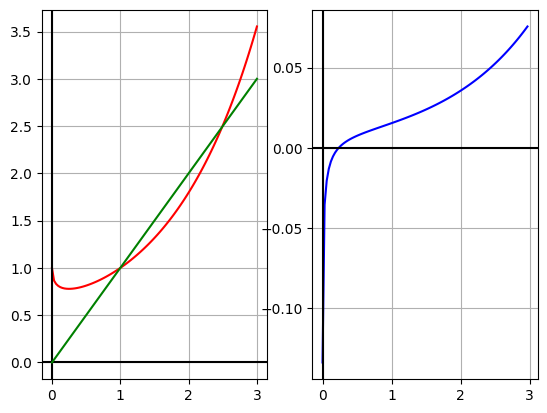

In [3]:
x = np.linspace(0, 3, 100)
y = np.exp(x - np.sqrt(x))
dy = np.diff(y)
plt.subplot(121)
plt.plot(x, y, 'r')
plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')
plt.plot(x, x, 'g')
plt.grid()
plt.subplot(122)
plt.plot(x[:99], dy, 'b')
plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')
plt.grid()
plt.show()

In [4]:
def g(x):
    return np.exp(x - np.sqrt(x))

def gln(x):
    return np.log(x) + np.sqrt(x)


def fixpoint(g ,xold, kmax=200, tol=1e-8):
    """Implementa nossa algoritmo de solução do ponto fixo

    Args:
        g (fun): Nossa função g
        xold (int): nosso primeiro x que chutamos
        kmax (int, optional): Número maximo de iterações. Defaults to 200.
        tol (float, optional): Tolerancia maxima que vamos aceitar. Defaults to 1e-8.
    """
    for k in range(1, kmax):
        xnew = g(xold)
        
        xdiff = xnew - xold
        #print("{0:3d} {1:10.6f} {2:10.6f} {3:10.6f}".format(k, xold, xnew, xdiff))
        
        
        if abs(xdiff/xnew) < tol:
            break
        xold = xnew
    else:
        xnew = None
    
    return xnew


for xold in (0.99,2.49,2.499):
    x = fixpoint(g, xold)
    print(x)
for xold in (0.99,2.49,2.499):
    x = fixpoint(gln, xold)
    print(x)  

0.9999999905579409
1.0000000058862932
None
None
2.4909092551193908
2.490909370930458


/data/user/0/ru.iiec.pydroid3/cache/ipykernel_29663/2166170336.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(x - np.sqrt(x))
/data/user/0/ru.iiec.pydroid3/cache/ipykernel_29663/2166170336.py:24: RuntimeWarning: invalid value encountered in double_scalars
  if abs(xdiff/xnew) < tol:
/data/user/0/ru.iiec.pydroid3/cache/ipykernel_29663/2166170336.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(x - np.sqrt(x))
/data/user/0/ru.iiec.pydroid3/cache/ipykernel_29663/2166170336.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(x) + np.sqrt(x)
/data/user/0/ru.iiec.pydroid3/cache/ipykernel_29663/2166170336.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.log(x) + np.sqrt(x)


Vemos que quando usamos a nossa função original, ela tem um erro quando usamos um chute de $2.499$,
então com uma casa decimal a menos ela converge. Porem quando tomamos o $\ln$ da nossa função que também nos da uma função igual, ela converge apena para $2.49$ e explode quando chutamos $0.99$

Vamos agora estudar o método da bisseção. Esse método é bastante utilizado e ele é garantido de convergir, a custo de não ser dos mais rápidos e também não generalizar bem para dimensões superiores. Esse método se apoia que nos já temos $2$ valores, $x_0, x_1$ tais que eles limitam a raiz, ou seja, $f(x_0)>0, f(x_1)<0$ e a raiz está dentro desse intervalo. O método da bisseção é bastante simples, ele divide o intervalo em dois, e verifica qual dos dois intervalos contém a raiz. Para isso, ele calcula o ponto médio do intervalo, $x_2 = \frac{x_0 + x_1}{2}$ e verifica se $f(x_2) > 0$ ou $f(x_2) < 0$. Se $f(x_2) > 0$, então a raiz está no intervalo $[x_0, x_2]$, se $f(x_2) < 0$, então a raiz está no intervalo $[x_2, x_1]$. Tendo isso em mente, apenas chamamos $x_2$ de $x_0$ ou $x_1$ e recomeçamos o processo novamente. O método da bisseção é garantido de convergir, pois ele sempre vai dividir o intervalo em dois, e como a função é contínua, ela vai diminuir o intervalo até que ele seja menor que $\epsilon$. Vamos implementar

In [5]:
def f(x):
    return np.exp(x - np.sqrt(x)) - x

def bisseccao(f, x0, x1, kmax=200, tol=1e-8):
    """Implementa o método da bisseccao

    Args:
        f (fun): nossa funão que queremos saber a raiz
        x_0 (flo): nosso estimativa do ponto que nos de um f>0
        x_1 (float): nossa estimativa do ponto que nos de f<0
        kmax (int, optional): Número maximo de iteracoes. Defaults to 200.
        tol (float, optional): tolerancia maxima permitida. Defaults to 1e-8.
    """
    f0 = f(x0)
    for k in range(1,kmax):
        x2 = (x0 + x1)/2
        fx2 = f(x2)
        
        if f0 * fx2 < 0:
            x1 = x2
        else:
            x0 , f0 = x2, fx2
        
        x2new = (x0 + x1)/2
        xdiff = abs(x2new - x2)
        #rowf = "{0:3d} {1:10.6f} {2:10.6f} {3:10.6f}"
        #print(rowf.format(k, x2new, xdiff, abs(f(x2new))))
        
        if abs(xdiff/x2new) < tol:
            break
    else:
        x2new = None
    return x2new
root = bisseccao(f,0, 1.5)
print(root); print(" ")
root = bisseccao(f, 1.5, 3)
print(root)

1.0000000018626451
 
2.490909330546856


Vamos nos voltar agora para o método de Newton-Raphson. Tal método ele é simples e bastante eficiente para acharmos raízes, além de generalizar bastante bem para dimensões superiores. Precisamos além de avaliar o valor da função, também vamos precisar avaliar a derivada do valor da função. Assumindo que nossa função seja continua e tenha primeira e segunda derivadas, a formula de interação para esse método se dá
$$
x^{(k)} = x^{(k-1)} - \frac{f(x^{(k-1)})}{f^\prime(x^{(k-1)})}, \quad k = 1,2,3,\cdots
$$
Mas é claro sofre de diversos problemas. Um dos maiores é a derivada que aparece no denominador. Um método de remediar isso, é utilizando o método da secante, na qual, partindo da equação de newton, vamos ter
$$
x^{(k)} = x^{(k-1)} - \frac{f(x^{(k-1)})}{\frac{f(x^{(k-1)}) - f(x^{(k-2)})}{x^{(k-1)} - x^{(k-2)}}}, \quad k = 2,3,4,\cdots
$$
Pois aproximamos a derivada como
$$
f^\prime(x^{(k-1)}) \approx \frac{f(x^{(k-1)}) - f(x^{(k-2)})}{x^{(k-1)} - x^{(k-2)}} \quad k = 2,3,4,\cdots
$$
Vamos implementar

In [6]:
def secant(f, x0, x1, kmax=200, tol=1e-8):
    """Implementa o método da secante

    Args:
        f (fun): função que queremos saber a raiz
        x0 (float): estimativa 1
        x1 (float): estimativa 2
        kmax (int, optional): Número de iterações maximo. Defaults to 200.
        tol (float, optional): tolerancia maxima. Defaults to 1e-8.
    """
    f0 = f(x0)
    for k in range(1,kmax):
        f1 = f(x1)
        razao = (x1 - x0)/(f1 - f0)
        x2 = x1 - f1 * razao
        
        xdiff = abs(x2 - x1)
        x0, x1 = x1, x2
        f0 = f1
        rowf = "{0:3d} {1:10.6f} {2:10.6f} {3:10.6f}"
        print(rowf.format(k, x2, xdiff, abs(f(x2))))
        
        if abs(xdiff/x2) < tol:
            break
    else:
        x2 = None
    return x2

root = secant(f, 0, 1.7)
print(root); print(" ")
root = secant(f, 2, 2.05)
print(root)

  1   1.400452   0.299548   0.158052
  2   0.552624   0.847828   0.273704
  3   1.090090   0.537466   0.042999
  4   1.017119   0.072971   0.008486
  5   0.999176   0.017942   0.000412
  6   1.000007   0.000831   0.000004
  7   1.000000   0.000007   0.000000
  8   1.000000   0.000000   0.000000
0.9999999999999898
 
  1   3.104704   1.054704   0.724615
  2   2.273086   0.831618   0.123210
  3   2.393940   0.120854   0.061992
  4   2.516324   0.122384   0.018265
  5   2.488472   0.027853   0.001707
  6   2.490852   0.002380   0.000040
  7   2.490909   0.000058   0.000000
  8   2.490909   0.000000   0.000000
  9   2.490909   0.000000   0.000000
2.4909093169459853


Vamos agora nos voltar para o método de Ridders'. Sua ideia é similar quanto ao método de Newton e da Secante, onde se busca o intercepto com o eixo $x$. Porém, ele faz de uma forma mais elegante. Inicialmente, ele assume que $f(x_0)f(x_1) < 0$. A ideia principal é multiplicar $f(x)$ por uma exponencial que a faz virar uma reta, da forma
$$
R(x) = f(x)e^{Qx}
$$
Independente do formato de $f(x)$, nossa função virará uma reta $R(x) = c_0 + c_1x$. Como vamos ter $3$ constantes a serem determinadas $Q, c_0, c_1$, vamos precisar de 3 pontos para determinar essas constantes. Inicialmente, pegamos nossos pontos $x_0, x_1$ e determinamos $x_2$ como sendo o ponto médio entre $x_0$ e $x_1$. Portanto, vamos ter que
$$
R_2 = \frac{R(x_0) + R(x_1)}{2}
$$
Onde usar que $R_i \equiv R(x_i)$ e também $f_i \equiv f(x_i)$. Definindo
$$
d = x_2 - x_0  = x_1 - x_2
$$
Jogando na nossa definção de $R$, vamos ter
$$
\begin{align}
f_0e^{Qx_0} + f_1e^{Qx_1} - 2f_2e^{Qx_2} &= 0\\
f_1 e^{2Qd} - 2f_2 e^{Qd} + f_0 &= 0
\end{align}
$$
Onde apenas retiramos o termo $e^{Qx_0}$. Resolvendo nossa equação quadrática para $e^{Qd}$, vamos ter
$$
e^{Qd} = \frac{f_2 - sign (f_0)\sqrt{(f_2^2 - f_0f_1)}}{f_1}
$$
Portanto, agora podemos determinar nosso ponto $x_3$ como sendo o intercepto com o eixo $x$, ou seja
$$
x_3 = x_2 - R_2\frac{x_2 - x_1}{R_2 - R_1} = x_2 - \frac{d}{R_1/R_2 - 1} = x_2 + sign(f_0)\frac{f_2d}{\sqrt{(f_2^2 - f_0f_1)}}
$$
Dividindo toda nossa equação por $f_0$, vamos ter
$$
x_3 = x_2 + (x_1 - x_2)\frac{f_2/f_0}{\sqrt{(f_2/f_0)^2 - f_1/f_0}}
$$

Vamos agora nos voltar para achar $0$ em polinômios. Existem várias formas de acharmos isso e até alguns algoritmos especializados. Mas vamos começar de uma forma bem pedestre. Inicialmente, do método de Newton-Raphson, podemos achar uma raiz de cada vez, ja que ele é bastante rápido. Vamos iniciar essa busca com os polinômios de Legendre, pois serão uteis futuramente. Para isso, vamos precisar achar as raízes desse polinômio. Chamando $P_n(x)$ o polinômio de Legendre de grau $n$ e denotando sua $i_{th}$ raiz por $x_i^\star$, vamos ter que
$$
\cos \left(\frac{2i + 1}{2n + 1}\pi\right) \geq x_i^\star \geq \cos \left(\frac{2i + 2}{2n + 1}\pi\right)
$$
Com isso, nosso primeiro chute para o método de Newton-Raphson se da
$$
x_i^{(0)} = \cos \left(\frac{4i + 3}{4n + 2}\pi\right)
$$
Vamos implementar

In [7]:
def legendre(n, x):
    """n: grau do legendre
       x: range"""
    if n == 0:
        val2 = 1
        dval2 = 0
    elif n ==1:
        val2 = x
        dval2 = 1
    else:
        val0 = 1; val1 = x
        for j in range(1,n):
            val2 = ((2*j+1)*x*val1 - j*val0)/(j+1)
            val0, val1 = val1, val2
        dval2 = n*(val0-x*val1)/(1-x**2)
    return val2, dval2
def legnewton(n, xold, kmax=200, tol=1e-8):
    """Acha uma raiz do polinomio de Legendre pelo método de newton

    Args:
        n (int): N_th polinomio de Legendre
        xold (float): chute inicial para o método
        kmax (int, optional): Número maximo de iterações. Defaults to 200.
        tol (floar, optional): tolerancia maxima permitida. Defaults to 1e-8.
    """
    for k in range(1, kmax):
        val, dval = legendre(n, xold)
        xnew = xold - val/dval
        
        xdiff = xnew - xold
        if abs(xdiff/xnew) < tol:
            break
        xold = xnew

    else:
        xnew = None
    return xnew
def legroots(n):
    """Repetidamente chama a função legnewton para achar varias raizes do polinomio de legendre

    Args:
        n (int): quantidade de raizes que queremos
    """
    roots = np.zeros(n)
    npos = n//2
    for i in range (npos):
        xold = np.cos(np.pi*(4*i + 3)/(4*n + 2))
        root = legnewton(n, xold)
        roots[i] = -root
        roots[-1-i] = root
    return roots
roots = legroots(9); print(roots)        

[-0.96816024 -0.83603111 -0.61337143 -0.32425342  0.          0.32425342
  0.61337143  0.83603111  0.96816024]


Uma outra forma de acharmos raízes é por meio dos autovalores, onde também vamos achar todas de uma única vez. Assim como vimos no capítulo anterior, podemos pegar uma matriz e transformar em uma equação linear. Vamos pegar o caminho inverso, pegando um polinômio e transformando-o em um problema de matrizes de autovalores. Vamos definir, então
$$
p(x) = c_0 + c_1x + c_2x^2 + \cdots + c_{n-1}x^{n-1} + x^n
$$
Conhecido como um polinômio mônico. Vamos definir também a matriz companheira, $\mathbf{C}$ de tamanho $n \times n$
$$
\mathbf{C} = \begin{bmatrix}
0 & 1 & 0 & \cdots & 0\\
0 & 0 & 1 & \cdots & 0\\
0 & 0 & 0 & \ddots & \vdots\\
\vdots & \vdots & \ddots & 0 & 1\\
-c_0 & -c_1 & \cdots & -c_{n-2} & -c_{n-1}
\end{bmatrix}
$$
Tal matriz tem um polinômio característico muito especial, onde analisando seu determinante em função de $\lambda$, vamos ter que seu polinômio característico é igual ao nosso polinômio inicial. Como já desenvolvemos vários métodos robustos, não fica difícil implementar tal método.

Vamos nos voltar para um problema mais complicado, que é sistemas de equações não lineares. Se fossemos escrever nosso problema, seria da forma
$$
\mathbf{f(x)} = \mathbf{0}
$$
O método de Newton-Raphson consegue se generalizar bem para dimensões maiores, então vamos iniciar com ele. Colocando nosso problema em números, vamos colocar que queremos resolver
$$
\begin{dcases}
f_0(x_0, x_1) = x_0^2 - 2x_0 + x_1^4 - 2x_1^2 +x_1 = 0\\
f_1(x_0, x_1) = x_0^2 + x_0 + 2x_1^3 -2x_1^2 - 1.5x_1 - 0.05 = 0
\end{dcases}
$$
Para a generalização do método de Newton-Raphson, vamos expandir nossa função $\mathbf{f(x)}$ em uma série de Taylor e assumir que ela tem primeira e segunda derivada. Como nossa solução é $\mathbf{x^\star}$, nosso iteração em um determinado ponto sera $\mathbf{x^{(k)}}$. Como forma de ser mais didatico, vamos expandir apenas uma função $f_i(x)$, ao redor do nosso ultimo iterato $\mathbf{x^{(k-1)}}$. Assim, vamos ter
$$
f_i(\mathbf{x}) = f_i(\mathbf{x^{(k-1)}}) + (\nabla f_i(\mathbf{x^{(k-1)}}))^T(\mathbf{x} - \mathbf{x^{(k-1)}}) + O(||\mathbf{x} - \mathbf{x^{(k-1)}}||^2)
$$
Onde $i = 0, 1, \cdots, n-1$. Reescrevendo essa equação em função dos termos de vetores, vamos ter
$$
\left( \nabla f_i(\mathbf{x^{(k-1)}}) \right)^T (\mathbf{x - x^{k-1}}) = \sum_{j=0}^{n-1} \frac{\partial f_i}{\partial x_j}|_{x_j^{(k-1)}} (x_j - x_j^{(k-1)})
$$
Introduzindo $\mathbf{J(x)}$ como a jacobiana, vamos ter
$$
\mathbf{J(x)} = \left\{ \frac{\partial f_i}{\partial x_j} \right\} = 
\begin{bmatrix}
\frac{\partial f_0}{\partial x_0} & \frac{\partial f_0}{\partial x_1} & \cdots & \frac{\partial f_0}{\partial x_{n-1}}\\
\frac{\partial f_1}{\partial x_0} & \frac{\partial f_1}{\partial x_1} & \cdots & \frac{\partial f_1}{\partial x_{n-1}}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial f_{n-1}}{\partial x_0} & \frac{\partial f_{n-1}}{\partial x_1} & \cdots & \frac{\partial f_{n-1}}{\partial x_{n-1}}
\end{bmatrix}
$$
Agrupando tudo, vamos ter
$$
\mathbf{f(x)} = \mathbf{f(x^{(k-1)})} + \mathbf{J(x^{(k-1)})}\left(\mathbf{x} - \mathbf{x^{(k-1)}}\right) + O\left(||\mathbf{x} - \mathbf{x^{(k-1)}}||^2\right)
$$
Assumindo a nossa solução, ou seja, $\mathbf{f(x^\star)} = \mathbf{0}$, vamos ter
$$
\mathbf{0} = \mathbf{f(x^{(k-1)})} + \mathbf{J(x^{(k-1)})}\left(\mathbf{x^\star} - \mathbf{x^{(k-1)}}\right)
$$
Como não termo $\mathbf{x^\star}$, vamos ter como nossa formula de iteração
$$
\mathbf{J(x^{(k-1)})}\left(\mathbf{x^k - x^{(k-1)}}\right) = -\mathbf{f(x^{(k-1)})}
$$


Mas claro que vamos precisar fazer uma mudança por causa da derivada, ou seja, vamos precisar transformar nossa equação em discreta. Para isso vamos nos relembrar da aproximação de derivada e aplicar aqui, logo
$$
\begin {align}
\frac{\partial f_i}{\partial x_j} &\approx \frac{f_i(\mathbf{x} + \mathbf{e_j}h) - f_i(\mathbf{x})}{h}\\
&= \frac{f_i(x_0, x_i, \dots, x_j + h, \dots, x_{n-1}) - f_i(x_0, x_i, \dots, x_j, \dots, x_{n-1})}{h}
\end{align}
$$
Vamos implementar

In [8]:
def termcrit(xolds,xnews):
    """
    Funcao que vai calcular um erro maximo que vamos aceitar para nossa iteracao
    xold: vetor com a iteracao passada
    xnew: novo x depois da iteracao
    """
    errs = np.abs((xnews-xolds)/xnews)
    return np.sum(errs)
def backsub(U,bs):
    """
    U: matriz triangular inferior
    bs: coeficientes
    """
    n = bs.size
    xs = np.zeros(n)
    for i in reversed(range(n)):
        xs[i] = (bs[i] - U[i, i+1:]@xs[i+1:])/U[i,i]
    return xs
def gauss_elim_pivot(inA, inbs):
    """
    A: matriz que queremos a solucao
    b: matriz dos coeficientes
    """
    A = np.copy(inA)
    bs = np.copy(inbs)
    n = bs.size
    
    for j in range(n-1):
            k = np.argmax(np.abs(A[j:,j])) + j
            if k != j:
                A[j,:], A[k,:] = A[k,:], A[j,:].copy()
                bs[j] , bs[k] =  bs[k], bs[j]
            
            for i in range(j+1, n):
                coeff = A[i,j] / A[j,j]
                A[i,j:] -=coeff*A[j,j:]
                bs[i] -= coeff*bs[j]
    
    xs = backsub(A,bs)
    return xs

In [9]:
def fs(xs):
    """Nossas duas funções que queremos saber as raizes

    Args:
        xs (array): Nossos valores de xs
    """
    x0, x1 = xs
    f0 = x0**2 -2*x0 + x1**4 - 2*x1**2 +x1
    f1 = x0**2 +x0 +2*x1**3 -2*x1**2 -1.5*x1 -0.05
    return np.array([f0, f1])
def jacobiano(fs, xs, h=1e-4):
    """Vai aproximar nosso jacobiano das funções

    Args:
        fs (func): função que queremos o jacobiano
        xs (array): valor de x que queremos calcular
        h (floar, optional): passo para nossa aproximação. Defaults to 1e-4.
    """
    n = xs.size
    iden = np.identity(n)
    Jf = np.zeros((n,n))
    fs0 = fs(xs)
    for j in range(n):
        fs1 = fs(xs + h*iden[:,j])
        Jf[:,j] = (fs1 - fs0)/h
    return Jf, fs0

def multi_newton(fs, jacobian, xolds, kmax=200, tol=1e-8):
    """Faz o nosso método de newton para sistema de equações não lineares

    Args:
        fs (func): Funções que queremos o 0
        jacobian (array): Jacobiano das nossas funções
        xolds (array): Nosso chute inicial das raizes
        kmax (int, optional): Número máximo de iterações. Defaults to 200.
        tol (int, optional): Tolerancia maxima permitida, criterio de parada. Defaults to 1e-8.
    """
    for k in range(1, kmax):
        Jf, fs_xolds = jacobiano(fs, xolds)
        xnews = xolds + gauss_elim_pivot(Jf, -fs_xolds)
        
        err = termcrit(xolds, xnews)
        #print(k, xnews, err)
        if err < tol:
            break
        xolds = np.copy(xnews)
    else:
        xnews = None
    return xnews
xolds = np.array([0,5])
xnews = multi_newton(fs,jacobiano,xolds)
print(xnews); print(fs(xnews))   
    
            

[-0.21113661 -0.29758286]
[1.66533454e-16 1.37390099e-15]


Vamos agora ver o metodo de Broyden. Um dos grande problemas do metodo de Newton é que ele acaba disperdicando muito calculo e tomando muitas computacoes desnecessarias, até. Como sempre vamos ter que reavaliar o jacobiano, valeria mais a pena pegar da iteracao anterior e dar um update nele.
Ademais, da nossa equacao, vamos ter uma boa aproximacao da derivada, na forma
$$
\mathbf{J(x^{(k)})}\left(\mathbf{x^{(k)} - x^{(k-1)}}\right) \approx \mathbf{f(x^{(k)}) - f(x^{(k-1)})}
$$
Essa é nossa equacao da secante. Vamos definir alguns nomes
$$
\mathbf{x^{(k)} - x^{(k-1)}} \equiv \mathbf{q^{(k)}}, \quad \mathbf{f(x^{(k)}) - f(x^{(k-1)})} \equiv \mathbf{y^{(k)}}
$$
Nossa equacao da secante fica entao
$$
\mathbf{J(x^{(k)})p} \approx \mathbf{y^{(k)}}
$$
Impondo um requerimento que
$$
\mathbf{J(x^{(k)}) p} = \mathbf{J(x^{(k-1)})p}
$$
Para qualquer vetor $\mathbf{p}$ que é ortogonal a $\mathbf{q^{(k)}}$, ou seja,